# **The Sparks Foundation - Data Science & Business Analytics Internship**

# **TASK 1 - Prediction using Supervised Machine Learning**

To Predict the percentage of marks of the students based on the number of hours they studied

## Author - Priyam Rastogi


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Reading the Data from the given link 
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


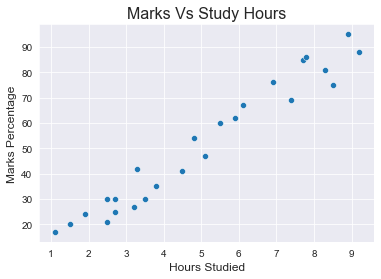

In [8]:
sns.set_style('darkgrid')
sns.scatterplot(x= data['Hours'],y= data['Scores'])
plt.title('Marks Vs Study Hours',size=16)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Marks Percentage', size=12)
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

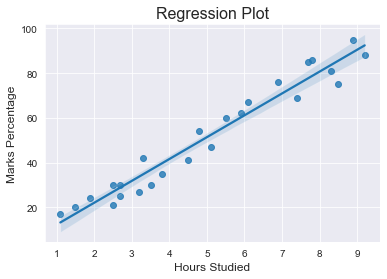

In [9]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=16)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Marks Percentage', size=12)
plt.show()


**It is confirmed that the variables are positively correlated.**

## **Preparing the data**
###  Splitting the Data

In [19]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values


# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


# **Training the Algorithm**
###  Fitting the Data into the model

In [27]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Traning Complete---------")

---------Traning Complete---------


## **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [21]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks

In [22]:
compare_sc = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_sc

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


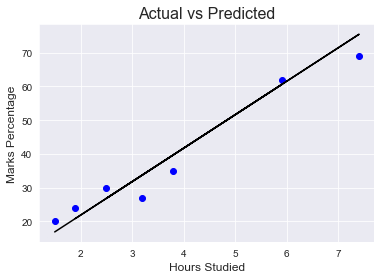

In [24]:
#Comparing Actual vs Predicted
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=16)
plt.xlabel('Hours Studied', size=12)
plt.ylabel('Marks Percentage', size=12)
plt.show()

In [31]:
# the predicted score of a student if he/she studies for 9.25 hrs/ day?hours = [9.25]
answer = regression.predict([hours])
print("No of Hours = {}".format(hours))
print("Score = {}".format(round(answer[0],3)))

No of Hours = [9.25]
Score = 93.893


## Evaluating the Model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [11]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**